<a href="https://colab.research.google.com/github/ianmuchai/studentsandfooddataset/blob/main/Students%26Food_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pip install openpyxl

In [6]:
from google.colab import files

In [7]:
uploaded=files.upload()

Saving food_coded.csv to food_coded.csv


In [9]:
file_name='food_coded.csv'

In [10]:
data=pd.read_csv(file_name)

In [11]:
data.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [ ]:
#Data cleaning and standardizing 'GPA' and 'weight'

In [13]:
data['GPA']=pd.to_numeric(data['GPA'], errors='coerce')

In [14]:
data['weight']=data['weight'].str.extract('(\d+)').astype(float)

In [15]:
data.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,NaN
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,240.0
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0


In [ ]:
# Handling the missing values

In [16]:
missing_values=data.isnull().sum()

In [17]:
missing_percentage=(missing_values/len(data))*100

In [18]:
columns_to_drop=missing_percentage[missing_percentage>30].index

In [19]:
data_cleaned=data.drop(columns=columns_to_drop)

In [20]:
for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object':
        mode_value = data_cleaned[column].mode()[0]
        data_cleaned[column].fillna(mode_value, inplace=True)
    else:
        median_value = data_cleaned[column].median()
        data_cleaned[column].fillna(median_value, inplace=True)

In [21]:
data.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,NaN
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,240.0
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0


In [ ]:
# Exploring distributions and correlations

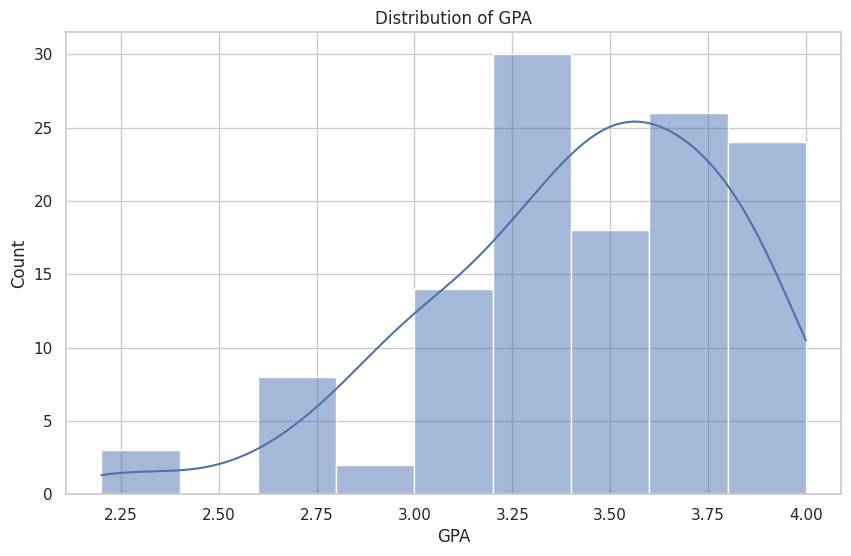

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['GPA'], kde=True)
plt.title('Distribution of GPA')
plt.show()

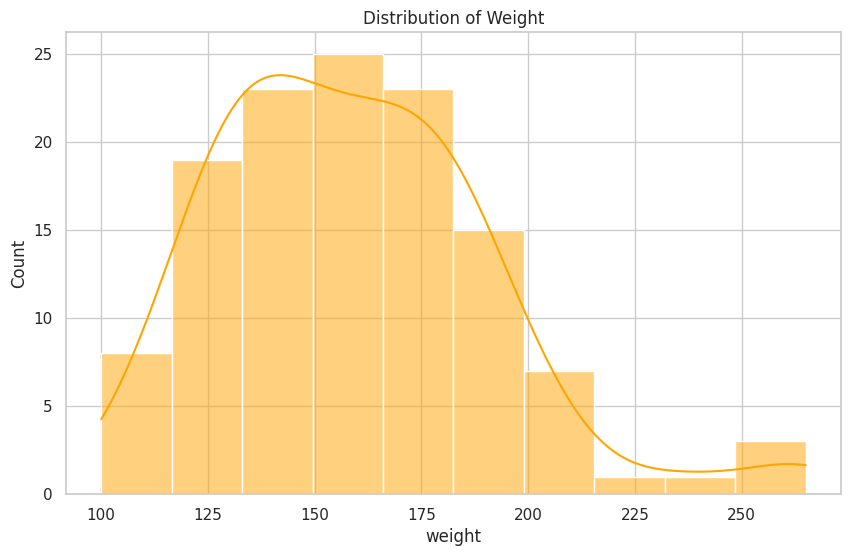

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['weight'], kde=True, color='orange')
plt.title('Distribution of Weight')
plt.show()

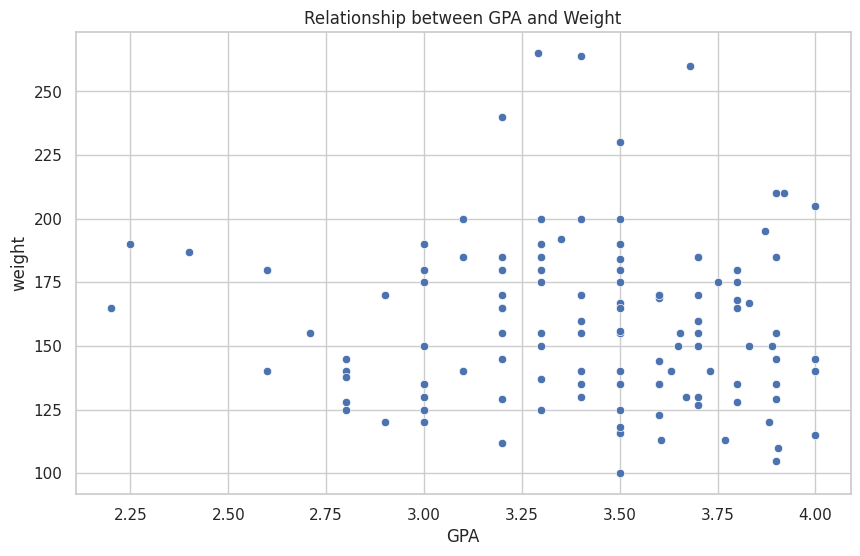

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GPA', y='weight', data=data_cleaned)
plt.title('Relationship between GPA and Weight')
plt.show()

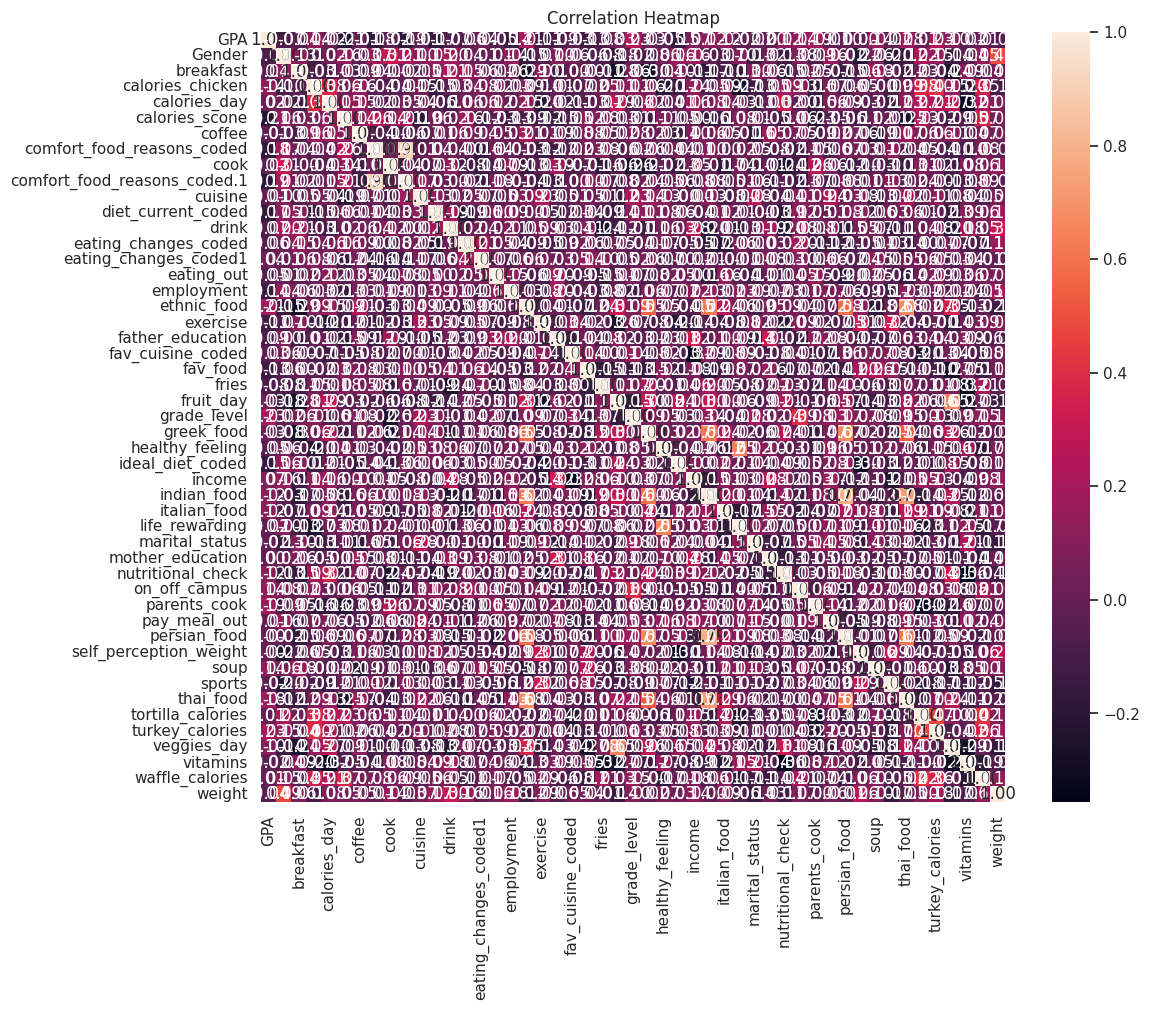

In [25]:
plt.figure(figsize=(12, 10))
numerical_data = data_cleaned.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [32]:
# Function to create a bar plot for categorical variables and GPA
def create_bar_plot(data, x, y, title):
    plt.figure(figsize=(10, 6))
    plt.bar(data[x], data[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.show()
    sns.barplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

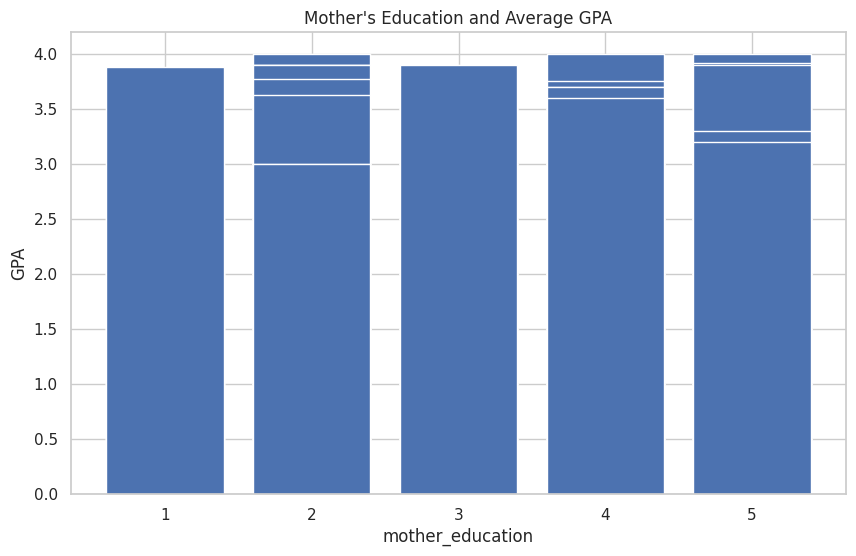

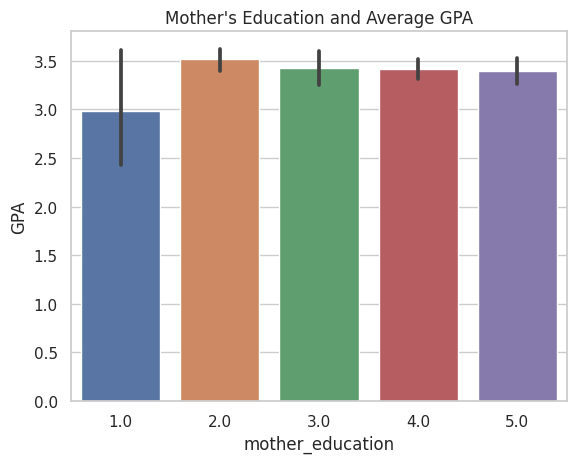

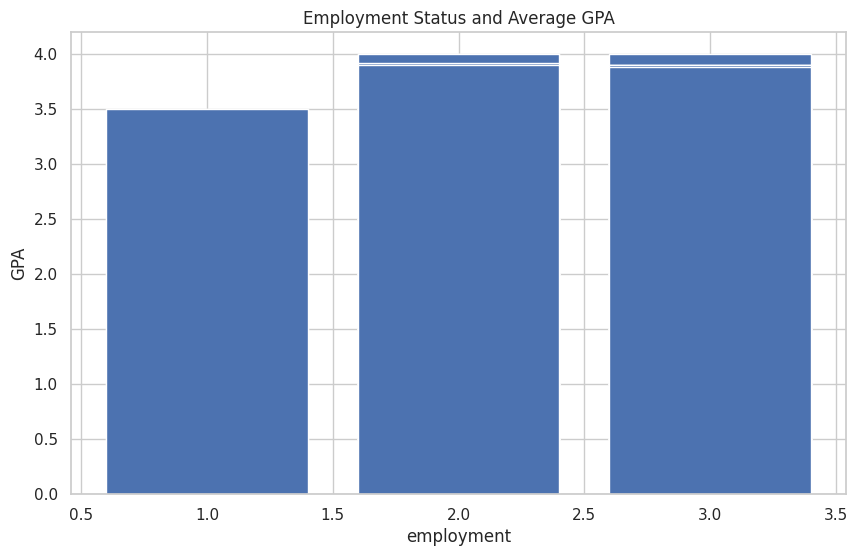

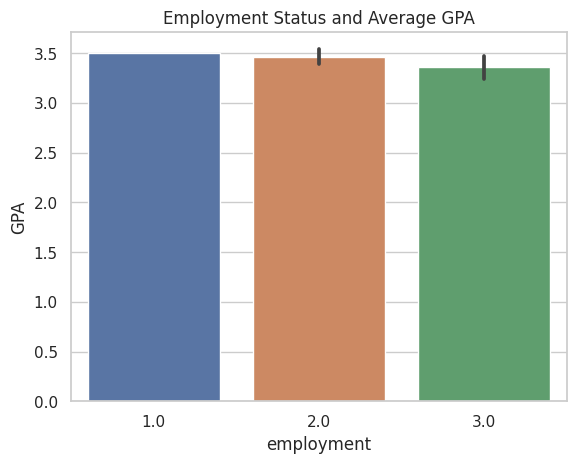

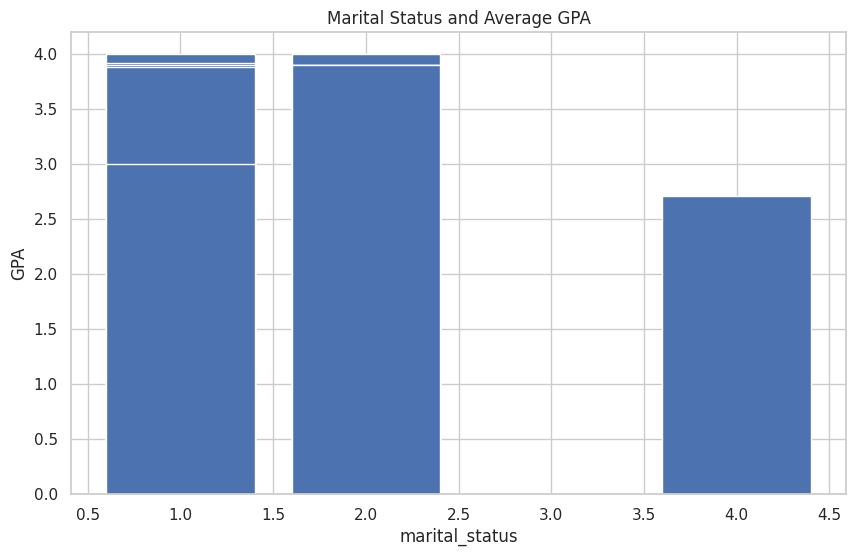

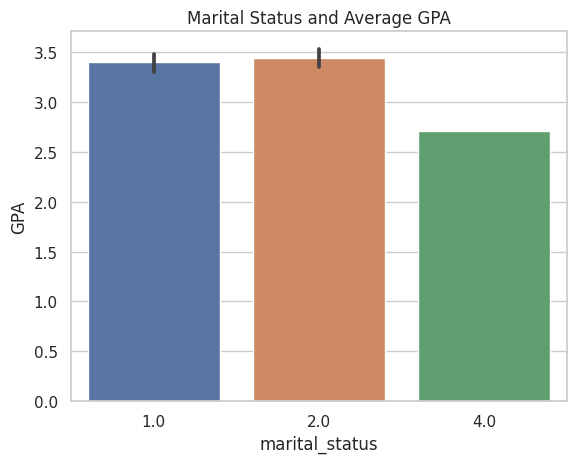

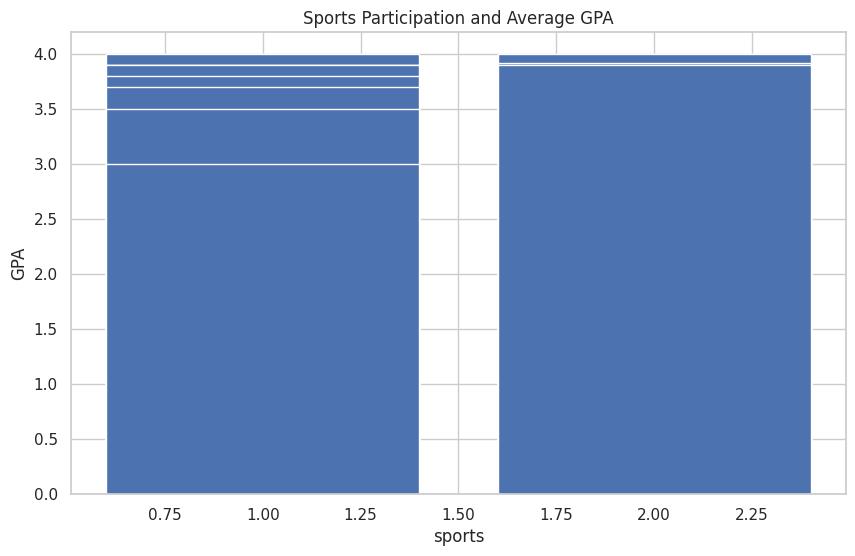

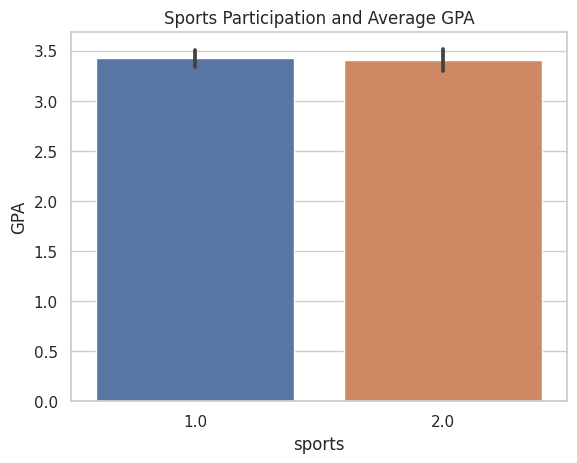

In [33]:
# Creating bar plots for categorical variables
create_bar_plot(data_cleaned, 'mother_education', 'GPA', "Mother's Education and Average GPA")
create_bar_plot(data_cleaned, 'employment', 'GPA', 'Employment Status and Average GPA')
create_bar_plot(data_cleaned, 'marital_status', 'GPA', 'Marital Status and Average GPA')
create_bar_plot(data_cleaned, 'sports', 'GPA', 'Sports Participation and Average GPA')
